<a href="https://colab.research.google.com/github/Denis-Yen/DataScience/blob/main/3_Regresi%C3%B3nLineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión Lineal Simple en Python

### Se usa el paquete statsmodel para regresion lineal o sklearn

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf # libreria para regresión lineal

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Machine en Python  Udemy/Data/Advertising.csv")
data.head()

In [ ]:
lm = smf.ols(formula="Sales~TV", data= data).fit() # El fit sirve para buscar el modelo que mejor se ajusta a los datos
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

El modelo lineal predictivo sería $Sales =7.032594 + 0.047537*TV $




In [ ]:
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [ ]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [ ]:
lm.rsquared

0.611875050850071

In [ ]:
lm.rsquared_adj

0.6099148238341623

In [ ]:
lm.summary() # Obtenemos el resumen 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 16 Jul 2021   Prob (F-statistic):           1.47e-42
Time:                        05:44:24   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Prediciendo las Ventas con el modelo lineal


In [ ]:
# Truco: Tener una variable en columna de tipo dataframe para predecir 
sales_pred = lm.predict(pd.DataFrame(data["TV"]))
sales_pred

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Length: 200, dtype: float64

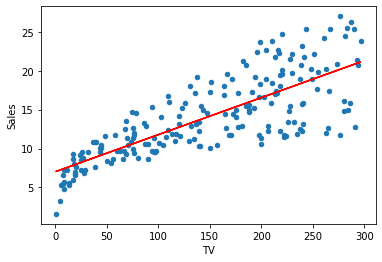

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
data.plot(kind = "scatter", x = "TV", y = "Sales")
plt.plot(pd.DataFrame(data["TV"]), sales_pred, "red", linewidth = 1.5)

In [ ]:
data["Sales_pred"] = 7.032594 + 0.047537*data["TV"]
data.head()

,TV,Radio,Newspaper,Sales,Sales_pred,RSE
0,230.1,37.8,69.2,22.1,17.970858,17.120148
1,44.5,39.3,45.1,10.4,9.147990,1.571638
2,17.2,45.9,69.3,9.3,7.850230,2.103660
3,151.5,41.3,58.5,18.5,14.234450,18.242722
4,180.8,10.8,58.4,12.9,15.627284,7.401664


In [ ]:
data["RSE"] = (data["Sales"] - data["Sales_pred"])**2
data.head(2)

,TV,Radio,Newspaper,Sales,Sales_pred,RSE
0,230.1,37.8,69.2,22.1,17.970858,17.049816
1,44.5,39.3,45.1,10.4,9.147990,1.567528


In [ ]:
SSD = sum(data["RSE"])
SSD

2102.5305838896525

In [ ]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

3.258656369238098

In [ ]:
sales_mean = np.mean(data["Sales"])
sales_mean

14.022500000000003

In [ ]:
error = RSE/sales_mean *100
error # Existe un 14% de error que no es explicado por el modelo

4.070845395057711

In [ ]:
plt.hist((data["Sales"] - data["Sales_pred"])) # Los errores se distribuyen normalmente con media cero 

# Regresión lineal multiple

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [ ]:
# Modelo 1 con una sola variable predictora "TV"
lm = smf.ols(formula="Sales~TV", data= data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 16 Jul 2021   Prob (F-statistic):           1.47e-42
Time:                        05:47:32   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
sales_pred = lm.predict(data["TV"])
sales_pred

In [ ]:
SSD =  sum((data["Sales"]- sales_pred)**2)
RSE = np.sqrt(SSD/(len(data)-2))
error = RSE/np.mean(data["Sales"])
SSD, RSE, error

(2102.530583131351, 3.258656368650462, 0.23238768897489473)

In [ ]:
# Añadimos el newspapper al modelo 2
lm2 = smf.ols(formula="Sales ~ TV + Newspaper",data=data).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Fri, 16 Jul 2021   Prob (F-statistic):           3.95e-45
Time:                        06:00:42   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
sales_pred = lm2.predict(data[["TV", "Newspaper"]])
sales_pred

In [ ]:
# CReamos el RSE
SSD =  sum((data["Sales"]- sales_pred)**2)
RSE = np.sqrt(SSD/(len(data)-3))
error = RSE/np.mean(data["Sales"])
SSD, RSE, error

(1918.5618118968266, 3.1207198602528847, 0.2225508903728211)

In [ ]:
# Añadimos Radio al modelo 3
lm3 = smf.ols(formula="Sales ~ TV + Radio",data=data).fit()
lm3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Fri, 16 Jul 2021   Prob (F-statistic):           4.83e-98
Time:                        06:02:37   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
sales_pred = lm3.predict(data[["TV", "Radio"]]) # LA Radio Aporta mas información al modelo
sales_pred

In [ ]:
# CReamos el RSE
SSD =  sum((data["Sales"]- sales_pred)**2)
RSE = np.sqrt(SSD/(len(data)-3))
error = RSE/np.mean(data["Sales"])
SSD, RSE, error

(556.9139800676187, 1.6813609125080016, 0.11990450436855063)

In [ ]:
# Agregamos las 3 VAriables predictoras al modelo
lm4 = smf.ols(formula="Sales ~ TV + Radio + Newspaper", data=data).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 16 Jul 2021   Prob (F-statistic):           1.58e-96
Time:                        06:07:50   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observamos que al agregar el newspapaer con 3 variables predictoras el modelo no mejora y tbn se aprecia que dicha variable no es signifcativa, asi que nos deshacemos de dicha predictora. Nos quedamos con el modelo 3, ya que predice mejor

In [ ]:
sales_pred = lm4.predict(data[["TV","Radio","Newspaper"]])
sales_pred

In [ ]:
# Calculamos el RSE
SSD = sum((data["Sales"]-sales_pred)**2)
RSE = np.sqrt(SSD/(len(data)-4))
error = RSE/np.mean(data["Sales"])
SSD, RSE, error

(556.8252629021872, 1.685510373414744, 0.12020041885646238)

## Problema de la regresion multiple
### Multicolinealidad, las variables predictoras estan correlacionadas entre si.

$VIF = \frac{1}{1 - R^2}$
* Si VIF < 1, Las variables no estan correlacionadas
* Si 1 < VIF <= 5, Las variables  estan moderadamente correlacionadas  (pueden formar parte del modelo)
* Si VIF > 5, Las variables  estan altamente  correlacionadas (deben ser eliminadas)

In [ ]:
data.corr() # Existe un relacion debil positiva entre la radio y el newspaper, se debe eliminar uan de las 2 variables

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [ ]:
# Newspaper + TV + Radio -> R^2 VIF = 1/(1-R^2)
lm_n = smf.ols(formula="Newspaper ~ TV + Radio", data=data).fit()
r_squared_n = lm_n.rsquared
VIF = 1 /(1-r_squared_n)
VIF
# Radio + Newspaper + TV  -> R^2 VIF = 1/(1-R^2)

1.1451873787239288

In [ ]:
# TV + Newspaper + Radio -> R^2 VIF = 1/(1-R^2)
lm_tv = smf.ols(formula="TV ~ Newspaper + Radio", data=data).fit()
r_squared_tv = lm_tv.rsquared
VIF = 1 /(1-r_squared_tv)
VIF # LA tv no esta correlacionada con ninguna otra variable más

1.00461078493965

In [ ]:
# Radio + Newspaper + TV  -> R^2 VIF = 1/(1-R^2)
lm_radio = smf.ols(formula="Radio ~ TV + Newspaper", data=data).fit()
r_squared_radio = lm_radio.rsquared
VIF = 1 /(1-r_squared_radio)
VIF

1.1449519171055353

Concluimos que el periodico y la radio estan correlacionadas dado que tiene casi el mismo VIF, queda claro que la TV no esta correlacionada con ninguna de ellas. Y nos quedamos con el modelo 3.

# Validación del Modelo

## Dividir la data en Conjunto de entrenamiento y testing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Machine en Python  Udemy/Data/Advertising.csv")
data.head()

In [ ]:
a = np.random.randn(len(data))
check = (a<0.8)
training = data[check]
testing = data[~check]

len(training), len(testing)

(164, 36)

In [ ]:
# Usando el conjunto de training
lm = smf.ols(formula="Sales ~ TV + Radio", data= training).fit()
lm.summary()

In [ ]:
# Validación del modelo con el conjunto de testing
sales_pred = lm.predict(testing)
sales_pred

In [ ]:
# Calculamos la SSD
SSD = sum((testing["Sales"]-sales_pred)**2)
RSE = np.sqrt(SSD/(len(testing)-2-1))
error = RSE/np.mean(testing["Sales"])
SSD, RSE, error

(81.06688738746642, 1.5673456367613174, 0.10122792056585474)

El modelo no tiene overfiting o sobreajuste. ya qu eno varia mucho

# Regresión Lineal con scikit-learn

Para regresión y selección de rasgos.
recursivamente ira poniendo y quitando variables en el modelo.

In [ ]:
from sklearn.feature_selection import RFE # RFE Recursive Features Elimination
from sklearn.svm import SVR # SVM = Support vector machine, SVR = Support Vector Regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Machine en Python  Udemy/Data/Advertising.csv")
data.head()

In [ ]:
features_cols = ["TV", "Radio", "Newspaper"] # Variables predictoras

In [ ]:
X = data[features_cols]
Y = data["Sales"]

In [ ]:
estimator = SVR(kernel="linear")
selector  = RFE(estimator=estimator,
               n_features_to_select=2,
               step=1)
selector  = selector.fit(X,Y)

In [ ]:
selector.support_ # Se quedaron la primera y segunda variable

array([ True,  True, False])

In [ ]:
selector.ranking_ # Las variables se orden de manera creciente tomando en cuenta su significancia.

array([1, 1, 2])

In [ ]:
from sklearn.linear_model import LinearRegression
x_pred = data[["TV", "Radio"]]
lm = LinearRegression()
lm.fit(x_pred, Y)

In [ ]:
lm.intercept_, lm.coef_

(2.921099912405138, array([0.04575482, 0.18799423]))

In [ ]:
# R cuadrado ajustado
lm.score(x_pred,Y)

0.8971942610828956

# Regresión con variables categoricas


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Machine en Python  Udemy/Data/Ecom Expense.csv")
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [ ]:
dummy_gender = pd.get_dummies(df["Gender"], prefix="Gender")
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix="City")
dummy_city_tier.head(5)

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [ ]:
columns_names = df.columns.values.tolist()
columns_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [ ]:
df_new = df[columns_names].join(dummy_gender)
columns_names = df_new.columns.values.tolist()
df_new.head(2)

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0


In [ ]:
df_new = df_new[columns_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [ ]:
# Variables predictoras
features_cols = ["Monthly Income", "Transaction Time", "Gender_Female",
                 "Gender_Male", "City_Tier 1", "City_Tier 2", "City_Tier 3",
                 "Record"]

In [ ]:
# Variables predicotras y la predicha
X = df_new[features_cols]
Y = df_new["Total Spend"]

In [ ]:
# Creamos el modelo
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Parametros dle modelo
lm.intercept_, lm.coef_

(-79.41713030137635,
 array([ 1.47538980e-01,  1.54946125e-01, -1.31025013e+02,  1.31025013e+02,
         7.67643260e+01,  5.51389743e+01, -1.31903300e+02,  7.72233446e+02]))

In [ ]:
# Observar los parametros junto a cada variable
list(zip(features_cols,lm.coef_))

[('Monthly Income', 0.14753898049205746),
 ('Transaction Time', 0.15494612549589704),
 ('Gender_Female', -131.02501325554584),
 ('Gender_Male', 131.02501325554567),
 ('City_Tier 1', 76.76432601049501),
 ('City_Tier 2', 55.13897430923278),
 ('City_Tier 3', -131.90330031972783),
 ('Record', 772.233445744565)]

In [ ]:
# R cuadrado
lm.score(X,Y) # R2 bajo, agregar mas variables al modelo

0.9187458997709432

### El modelo quedaria como:

Total_Spend = -79.41713030137635 + Monthly Incomex0.14753898049205746 + Transaction Timex0.15494612549589704 + Gender_Femalex-131.02501325554584 + Gender_Malex131.02501325554567 + City_Tier1x76.76432601049501 + City_Tier2x55.13897430923278 + City_Tier3x-131.90330031972783 + Recordx772.233445744565

* Si es hombre y vive en CT1: 
  * -79.41713030137635 + Monthly Incomex0.14753898049205746 + Transaction Timex0.15494612549589704 + 131.02501325554567 + 76.76432601049501 + Recordx772.233445744565
* Si es hombre y vive en CT2:
  * -79.41713030137635 + Monthly Incomex0.14753898049205746 + Transaction Timex0.15494612549589704 + 131.02501325554567 + 55.13897430923278 + Recordx772.233445744565
* Si es hombre y vive en CT3:
  * -79.41713030137635 + Monthly Incomex0.14753898049205746 + Transaction Timex0.15494612549589704 + 131.02501325554567 - 131.90330031972783 + Recordx772.233445744565

* Si es mujer y vive en CT1:
  * -79.41713030137635 + Monthly Incomex0.14753898049205746 + Transaction Timex0.15494612549589704 -131.02501325554584 + 76.76432601049501 + Recordx772.233445744565

* Si es mujer y vive en CT2:
  * -79.41713030137635 + Monthly Incomex0.14753898049205746 + Transaction Timex0.15494612549589704 -131.02501325554584 + 55.13897430923278 + Recordx772.233445744565

* Si es mujer y vive en CT3:
  * -79.41713030137635 + Monthly Incomex0.14753898049205746 + Transaction Timex0.15494612549589704 -131.02501325554584 - 131.90330031972783 + Recordx772.233445744565

In [ ]:
# Predicción - 1 forma
df_new["Prediction"] = -79.41713030137635 + df_new["Monthly Income"] * 0.14753898049205746 + df_new["Transaction Time"]*0.15494612549589704 + df_new["Gender_Female"] * (-131.02501325554584) + df_new["Gender_Male"] * 131.02501325554567 + df_new["City_Tier 1"] * 76.76432601049501 + df_new["City_Tier 2"] * 55.13897430923278 + df_new["City_Tier 3"] * (-131.90330031972783) + df_new["Record"] * 772.233445744565
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,Prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335


In [ ]:
# Predicción - 2 forma
df_new["Prediction"] = lm.predict(df_new[features_cols])
df_new.head()

In [ ]:
# Calculamos la suma de los cuadrados de los errores
SSD = np.sum((df_new["Prediction"] - df_new["Total Spend"])**2)
RSE = np.sqrt(SSD/len(df_new)-len(features_cols)-1)
Total_Spend_mean = np.mean(df_new["Total Spend"])
error = RSE/Total_Spend_mean

SSD, RSE, error # Existe un 13% de error que noe s epxlicado por el modelo

(1517733985.340816, 801.5947080211582, 0.13006194434791704)

In [ ]:
# Interar todas las variables del modleo 
df_new = df_new[columns_names].join(dummy_city_tier)

from sklearn.feature_selection import RFE
from sklearn.svm import SVR

features_cols = ["Monthly Income", "Transaction Time", "Gender_Female",
                 "Gender_Male", "City_Tier 1", "City_Tier 2", "City_Tier 3",
                 "Record", "Age "]
X = df_new[features_cols]
Y = df_new["Total Spend"]

estimator = SVR(kernel="linear")
selector  = RFE(estimator=estimator,
               n_features_to_select=7,
               step=1)
selector  = selector.fit(X,Y)

In [ ]:
selector.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

## Reduciendo las variables dummy n-1

Los coeficientes de genero hombre y city tier 1 estaran contenidas en el intercepto.

In [ ]:
dummy_gender = pd.get_dummies(df["Gender"], prefix="Gender").iloc[:,1:] # Todas las filas y nos quedamos con la ultima del dataset
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix="City").iloc[:,1:]
dummy_city_tier.head()

In [ ]:
columns_names = df.columns.values.tolist()
df_new = df[columns_names].join(dummy_gender)
columns_names = df_new.columns.values.tolist()
df_new = df_new[columns_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0


In [ ]:
features_cols = ["Monthly Income", "Transaction Time",
                 "Gender_Male","City_Tier 2", "City_Tier 3",
                 "Record"]
X = df_new[features_cols]
Y = df_new["Total Spend"]

lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lm.intercept_

-133.67781754642238

In [ ]:
list(zip(features_cols, lm.coef_))

[('Monthly Income', 0.1475389804920575),
 ('Transaction Time', 0.1549461254958966),
 ('Gender_Male', 262.0500265110957),
 ('City_Tier 2', -21.625351701263007),
 ('City_Tier 3', -208.6676263302229),
 ('Record', 772.2334457445636)]

# Transformación de variables para conseguir una relacion no lineal 

In [ ]:
import pandas as pd 
data_auto = pd.read_csv("/content/drive/MyDrive/Machine en Python  Udemy/Data/auto-mpg.csv")
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


Text(0.5, 1.0, 'CV vs MPG')

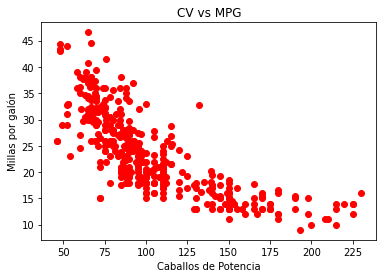

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
data_auto["mpg"] = data_auto["mpg"].dropna()
data_auto["horsepower"] = data_auto["horsepower"].dropna()
plt.plot(data_auto["horsepower"],data_auto["mpg"], "ro" )
plt.xlabel("Caballos de Potencia")
plt.ylabel("Millas por galón")
plt.title("CV vs MPG")

Se observa una relación inversa no muy lineal, vamos a profar con diferentes modelos.

#### Modelo de regresion lineal

* mpg = a + b * horsepower

In [ ]:
X = data_auto["horsepower"].fillna(data_auto["horsepower"].mean()) # Reemplazamos los NA con el promedio
Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())
x_data = X[:, np.newaxis]

lm = LinearRegression() #Requiere de formato dataframe
lm.fit(x_data,Y)

In [ ]:
type(X) # objeto de tipo series
type(x_data), # Es un array ndimesional

(numpy.ndarray,)

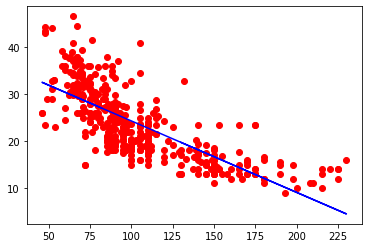

In [ ]:
%matplotlib inline
plt.plot(X, Y, "ro")
plt.plot(X, lm.predict(x_data), color = "blue")

In [ ]:
lm.score(x_data, Y)

0.574653340645025

In [ ]:
SSD = np.sum((Y - lm.predict(x_data))**2)
RSE = np.sqrt(SSD/len(x_data)-1)
y_mean = np.mean(Y)
error = RSE/y_mean

SSD, RSE, error

(10315.75196006092, 4.940471238582748, 0.21010252948625172)

#### Modelo de regresion cuadrático

* mpg = a + b * horsepower^2

In [ ]:
x_data = X**2
x_data = x_data[:,np.newaxis]

In [ ]:
lm = LinearRegression()
lm.fit(x_data, Y)

In [ ]:
lm.score(x_data, Y)

0.4849887034823205

In [ ]:
SSD = np.sum((Y - lm.predict(x_data))**2)
RSE = np.sqrt(SSD/len(x_data)-1)
y_mean = np.mean(Y)
error = RSE/y_mean

SSD, RSE, error

(12490.350340501926, 5.455676832957554, 0.2320125848951901)

#### Modelo de regresion lineal y cuadrático

* mpg = a + b* horsepower + c * horsepower^2

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [ ]:
poly = PolynomialFeatures(degree=2) #Grado del polinomio = 2
x_data = poly.fit_transform(X[:,np.newaxis])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


In [ ]:
lm = linear_model.LinearRegression()
lm.fit(x_data, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lm.score(x_data, Y)

0.6439066584257469

In [ ]:
lm.intercept_, lm.coef_

(55.026192447081144, array([ 0.        , -0.43404318,  0.00112615]))

In [ ]:
# Calculamos el R2 para 5 grados del polinomio
for d in range(2,6):
  poly = PolynomialFeatures(degree=d)
  x_data = poly.fit_transform(X[:,np.newaxis])
  lm = linear_model.LinearRegression()
  lm.fit(x_data, Y)
  print("Regresión de grado "+str(d))
  print(lm.score(x_data, Y))
  print(lm.intercept_)
  print(lm.coef_)
  regrestaion_validatión(x_data, Y, lm.predict(x_data))


Regresión de grado 2
0.6439066584257469
55.026192447081144
[ 0.         -0.43404318  0.00112615]
SSD: 8636.18, RSE: 4.5 y_mean: 23.51, error:19.0%
Regresión de grado 3
0.6444678885560744
58.44877411148572
[ 0.00000000e+00 -5.27113167e-01  1.89736722e-03 -1.95723195e-06]
SSD: 8622.57, RSE: 4.5 y_mean: 23.51, error:19.0%
Regresión de grado 4
0.6467674189704502
40.096643848807936
[ 0.00000000e+00  1.62563541e-01 -7.10892744e-03  4.65580255e-05
 -9.15840092e-08]
SSD: 8566.8, RSE: 4.48 y_mean: 23.51, error:19.0%
Regresión de grado 5
0.6547512491371991
-40.694028853270524
[ 0.00000000e+00  4.00021894e+00 -7.54802468e-02  6.19621641e-04
 -2.36220984e-06  3.41983153e-09]
SSD: 8373.17, RSE: 4.43 y_mean: 23.51, error:19.0%


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is

In [ ]:
def regrestaion_validatión(x_data, Y, Y_pred):
    SSD = round(np.sum((Y - Y_pred)**2),2)
    RSE = round(np.sqrt(SSD/len(x_data)-1),2)
    y_mean = round(np.mean(Y),2)
    error = round(RSE/y_mean,2)
    print("SSD: "+str(SSD)+ ", RSE: "+str(RSE)+" y_mean: "+str(y_mean)+", error:" +str(error*100)+"%")


# Outliers

In [ ]:
import pandas as pd 
data_auto = pd.read_csv("/content/drive/MyDrive/Machine en Python  Udemy/Data/auto-mpg.csv")
data_auto.head()

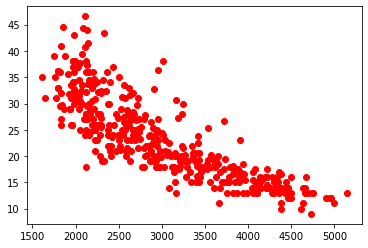

In [4]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(data_auto["weight"], data_auto["mpg"], "ro")

In [5]:
X = data_auto["displacement"].fillna(data_auto["displacement"].mean())
X = X[:, np.newaxis]
Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


In [6]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X,Y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
lm.score(X,Y)

0.6261049762826918

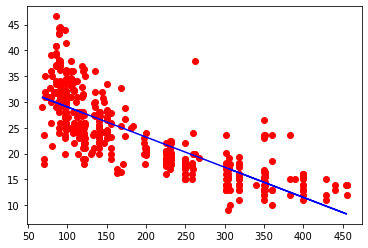

In [9]:
%matplotlib inline
plt.plot(X,Y, "ro")
plt.plot(X, lm.predict(X), "blue")

In [13]:
data_auto[(data_auto["displacement"]>300) & (data_auto["mpg"]>20)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
258,20.2,8,302.0,139.0,3570,12.8,78,1,mercury monarch ghia
305,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls


In [15]:
data_auto_clean = data_auto.drop([395, 258, 305,372])

In [17]:
# Corrermos nuevamente el modelo eliminando ya los outliers, veremos i mejor el r2
X = data_auto_clean["displacement"].fillna(data_auto_clean["displacement"].mean())
X = X[:, np.newaxis]
Y = data_auto_clean["mpg"].fillna(data_auto_clean["mpg"].mean())

lm = LinearRegression()
lm.fit(X,Y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
lm.score(X,Y) # el r2 ah mejorado na vez eliminada los outliers

0.6466514317531822

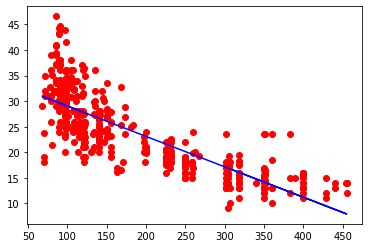

In [19]:
%matplotlib inline
plt.plot(X,Y, "ro")
plt.plot(X, lm.predict(X), "blue")